# Plotting the band structure and projected density of states (pDOS) from CP2K output-files

_A more detailed description of the different features is given in the example [Plotting the band structure and projected density of states (pDOS) from Quantum ESPRESSO output-files](plots-band_structure_and_pdos_qe.ipynb)._

## The band structure plot


To plot the band structure from the CP2K output the function ``read_band_structure`` from the `io` sub-package can be used to parse the eigenvalues and k-points from the band output file:

In [1]:
from aim2dat.io.cp2k import read_band_structure

band_structure = read_band_structure("files/el_bands_cp2k/bands.bs")

The output of the function is a dictionary containing a list of k-points and a nested list of eigenvalues:

In [2]:
band_structure.keys()

dict_keys(['kpoints', 'unit_y', 'bands', 'occupations', 'path_labels'])

Now the ``BandStructurePlot`` class in the ``plots`` sub-package is used to visualize the band structure.
For non-cubic systems the unit-cell needs to be given as nested list or numpy-array to scale the k-points accordingly using the function ``set_reference_cell``.
Additional attributes can be set to show and store the plot:

In [3]:
from aim2dat.plots.band_structure_dos import BandStructurePlot

bands_plot = BandStructurePlot()
bands_plot.store_path = "."
bands_plot.store_plot = True
bands_plot.show_plot = True
bands_plot.set_reference_cell(
    [
        [9.389, 0.000, 0.000],
        [0.000, 5.865, 0.000],
        [0.000, 0.000, 11.591],
    ]
)

The band structure can now be loaded into the object and plotted:

In [4]:
bands_plot.import_band_structure(
    data_label="test_band_structure",
    kpoints=band_structure["kpoints"],
    occupations=band_structure["occupations"],
    path_labels=band_structure["path_labels"],
    bands=band_structure["bands"],
    unit_y=band_structure["unit_y"],
    align_to_vbm=True,
)

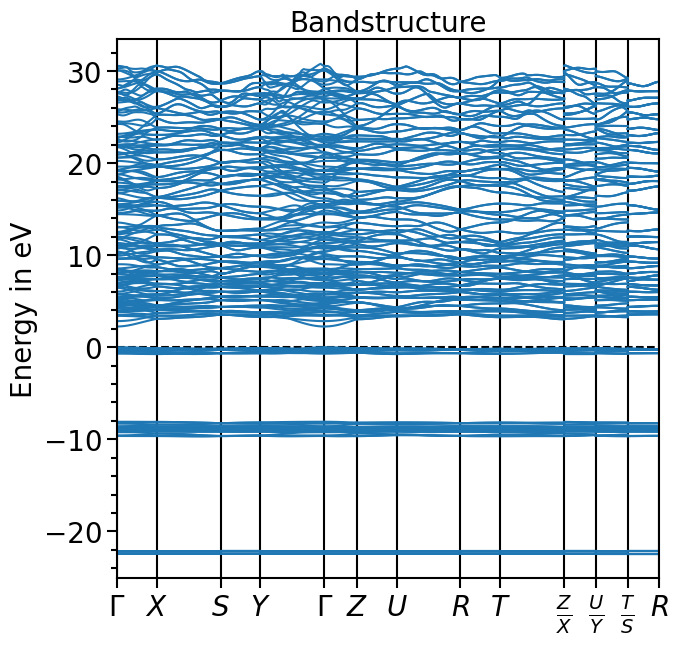

In [5]:
plot = bands_plot.plot(
    "test_band_structure", plot_title="Bandstructure", plot_name="bands_plot.png"
)

## The projected density of states plot

The procedure to plot the projected density of states is very similar to plotting the band structure. There is a function in the ``io`` sub-package to parse the projected density of states from the output-files.

In this case the path to the folder needs to be given. Based on the standard pattern of the file names of CP2K the corresponding files are read and the information is parsed:

In [6]:
from aim2dat.io.cp2k import read_atom_proj_density_of_states

pdos = read_atom_proj_density_of_states("files/el_pdos_cp2k/")

print(pdos["pdos"][0].keys())

dict_keys(['s', 'px', 'py', 'pz', 'd-2', 'd-1', 'd0', 'd+1', 'd+2', 'kind'])


Next, an object of the ``DOSPlot`` class is created and the pojected density of states can be loaded. We shift the pDOS straight-away such that the valence band maximum is at 0 eV with the parameter ``shift_dos``.

The parameters ``sum_kinds``, ``sum_principal_qn`` and ``sum_magnetic_qn`` sum up over different atoms of the same element, the principal and magnetic quantum numbers, respectively.

As the output of CP2K contains the energies and intensities of single levels it is necessary to apply smearing function to obtain reasonable results. Here, we can apply a Gaussian function whose sigma and delta parameters can be adjusted using the attributes ``smearing_delta`` and ``smearing_sigma``.

In [7]:
from aim2dat.plots.band_structure_dos import DOSPlot

dos_plot = DOSPlot()
dos_plot.import_projected_dos(
    "test_pdos",
    pdos["energy"],
    pdos["pdos"],
    shift_dos=-pdos["e_fermi"],
    sum_kinds=True,
    sum_principal_qn=True,
    sum_magnetic_qn=True,
    use_smearing=True,
)

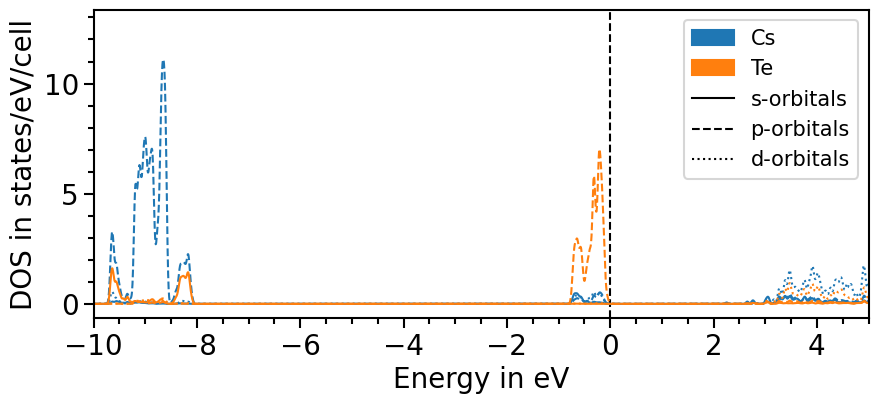

In [8]:
dos_plot.show_plot = True
dos_plot.show_legend = True
dos_plot.x_range = (-10, 5)
plot = dos_plot.plot("test_pdos")

The total density of states can be included by setting the attribute `sum_pdos` to `True`:

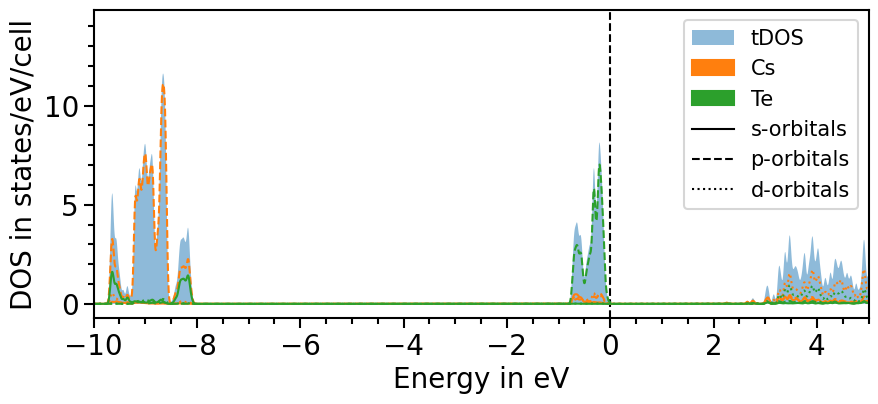

In [9]:
dos_plot.sum_pdos = True
plot = dos_plot.plot("test_pdos")

## Band structure + projected density of states plot

The two previous plots can also be combined in one figure with the `BandStructureDOSPlot` class:

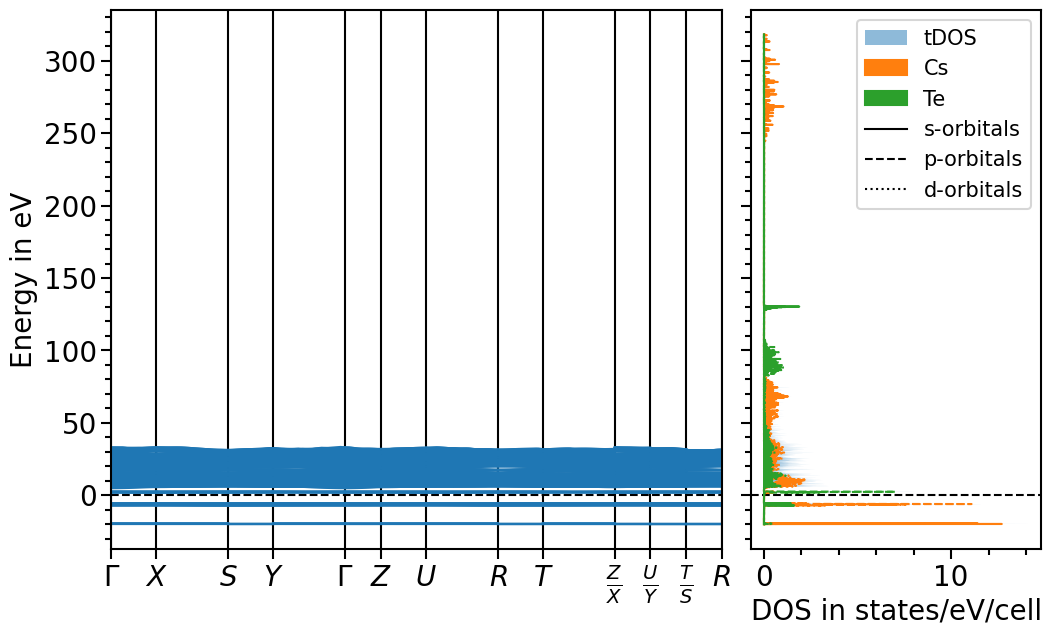

In [10]:
from aim2dat.plots.band_structure_dos import BandStructureDOSPlot

bands_dos_plot = BandStructureDOSPlot()
bands_dos_plot.set_reference_cell(
    [
        [9.389, 0.000, 0.000],
        [0.000, 5.865, 0.000],
        [0.000, 0.000, 11.591],
    ]
)
bands_dos_plot.show_plot = True
bands_dos_plot.sum_pdos = True
bands_dos_plot.import_band_structure(
    data_label="test_band_structure_dos",
    kpoints=band_structure["kpoints"],
    path_labels=band_structure["path_labels"],
    occupations=band_structure["occupations"],
    bands=band_structure["bands"],
    unit_y=band_structure["unit_y"],
)
bands_dos_plot.import_projected_dos(
    "test_band_structure_dos",
    pdos["energy"],
    pdos["pdos"],
    sum_kinds=True,
    sum_principal_qn=True,
    sum_magnetic_qn=True,
    use_smearing=True,
)
plot = bands_dos_plot.plot("test_band_structure_dos")

Finally, the range for the x- and y-axis can be adjusted and the valence band maximum is set to 0 eV:

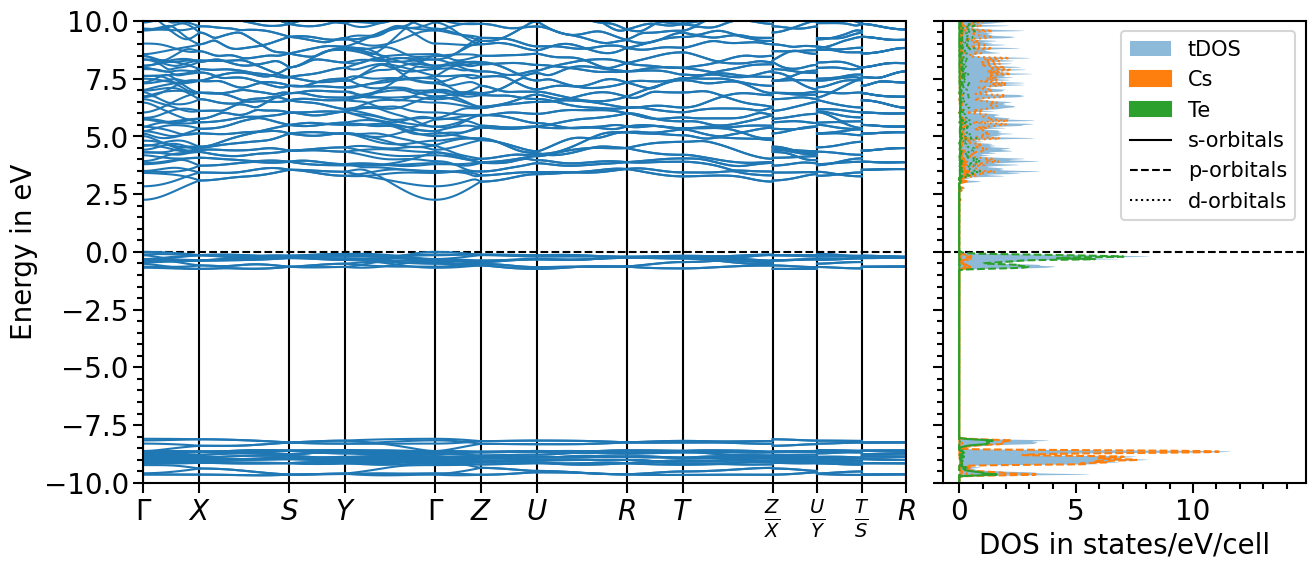

In [11]:
bands_dos_plot.ratio = (15, 6)
bands_dos_plot.y_range = (-10, 10)
bands_dos_plot.shift_bands_and_dos_to_vbm("test_band_structure_dos")
plot = bands_dos_plot.plot("test_band_structure_dos")